# OCMR Tutorial
## 1. Setup ISMRMRD library
- ### Install ismrmrd-python https://github.com/ismrmrd/ismrmrd-python

In [ ]:
!python /ismrmrd-python/setup.py install # (Only needed for the first run)

- ### Install ismrmrd-python-tools https://github.com/ismrmrd/ismrmrd-python-tools 

In [ ]:
!python /ismrmrd-python-tools/setup.py instlall # (Only needed for the first run)

## 2. Tutorial to read the k-space from OCMR data

#### Dowload data from www.ocmr.edu. Download Python Readwrapper "read_ismrmrd.py" from https://github.com/MRIOSU/OCMRRun. 
- ### Import the required libraries

In [1]:
# import required library
import numpy as np
import matplotlib.pyplot as plt
import math

from ismrmrdtools import show, transform

# import ReadWrapper
import read_ismrmd as re

- ### Read k-space data from *.h5 file, display the scan parameters

In [ ]:
# Load the data
filename = './data/us_0165_pt_1_5T.h5'
kdata,param = re.read_ismrmrd(filename);
# display size of kdata and scan parmaters
dim_kdata = kdata.shape;
print('Dim of kdata: ', kdata.shape)
print('Scan paramters:')
import pprint
pprint.pprint(param)

- ### Show the Sampling Pattern (1st slice)

0


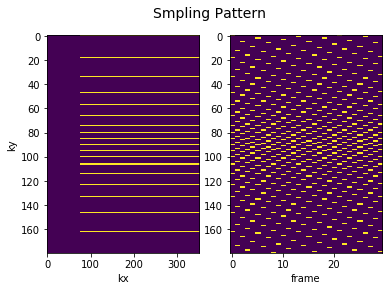

In [15]:
# Show the sampling Pattern (1st slice)
# kdata_tmp-[kx,ky,kz,coil,phase,set,slice,rep], samp-[kx,ky,kz,phase,set,slice,rep]
dim_kdata = kdata.shape; CH = dim_kdata[3]; SLC = dim_kdata[6]; 
kdata_tmp = np.mean(kdata, axis = 8); # average the k-space if average > 1
samp = (abs(np.mean(kdata_tmp, axis = 3)) > 0).astype(np.int) # kx ky kz phase set slice

slc_idx = math.floor(SLC/2); # shwo the 1st slice
print(slc_idx)
fig1 = plt.figure(1); fig1.suptitle("Smpling Pattern", fontsize=14);
# ky by kx
plt.subplot(1,2,1); tmp = plt.imshow(np.transpose(np.squeeze(samp[:,:,0,0,0,slc_idx])),aspect='auto') ;plt.xlabel('kx');plt.ylabel('ky'); tmp.set_clim(0.0,1.0)
# ky by frame
plt.subplot(1,2,2); tmp = plt.imshow(np.squeeze(samp[int(dim_kdata[0]/2),:,0,:,0,slc_idx]),aspect='auto'); plt.xlabel('frame'); tmp.set_clim(0.0, 1.0)

- ### Show the time averaged image (All slices)

(352, 180, 1, 30, 1, 1, 1)
(352, 180, 1, 24, 30, 1, 1, 1)


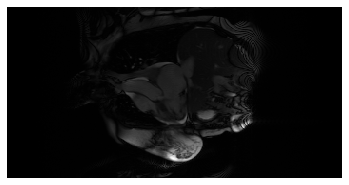

In [18]:
slc_idx = math.floor(SLC/2);
# Average the k-sapce along phase(time) dimension
# kdata_tmp-[kx,ky,kz,coil,phase,set,slice,rep], samp-[kx,ky,kz,phase,set,slice,rep]
kdata_sl = kdata_tmp[:,:,:,:,:,:,slc_idx,0];
samp_avg =  np.repeat(np.sum(samp[:,:,:,:,:,slc_idx,0],3), CH, axis=3) + np.finfo(float).eps
kdata_sl_avg = np.divide(np.squeeze(np.sum(kdata_sl,4)), np.squeeze(samp_avg));
# IFFT (2D image)
im_avg = transform.transform_kspace_to_image(kdata_sl_avg, [0,1]);
# Sum of Square
im = np.sqrt(np.sum(np.abs(im_avg) ** 2, 2))
# Show the image
fig2 = plt.figure(1); plt.imshow(np.transpose(im), cmap = 'gray'); plt.axis('off');